In [51]:
!pip install numpy matplotlib control

In [2]:
from numpy import *
from matplotlib import pyplot as plt
from control.matlab import *
%matplotlib inline

In [3]:
data = [
    (tf([1.], [2., 0.3, 1.]), "Пример"),
    (tf([1], [1, 0]), "Интегрирующее"),
    (tf([2], [1]), "Дифференцирующее"),
    (tf([1], [0, 1]), "Усилительное (безынерционное)"),
    (tf([1], [2, 1]), "Апериодическое 1-го порядка (инерционное)"),
    (tf([1], [2, 5, 1]), "Апериодическое 2-го порядка (все корни вещественные)"),
    (tf([1], [2, 1, 1]), "Kолебательное"),
    (tf([1], [2, 0, 1]), "Kонсервативное"),
    (tf([1], [2, 1, 0]), "Интегрирующее с запаздыванием (реальное интегрирующее)"),
    (tf([1, 0], [2, 1]), "Дифференцирующее с запаздыванием (реальное дифференцирующее)"),
    (tf([4, 2], [1, 1]), "Форсирующее"),
    (tf([4, 2], [1, 0]), "Изодромное")
]

In [6]:
def getStepImpulse(fooTF, tau):
    t = arange(0.0, tau, 0.1)
    y_step, x_step = step(fooTF, T=tau)
    y_impulse, x_impulse = impulse(fooTF, T=tau)
    return y_step, x_step, y_impulse, x_impulse

In [7]:
def plotBuild(y1, x1, y2, x2):
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(x1, y1, color='red', linewidth=0.85)
    plt.axhline(1.0, color='black', linestyle='--', linewidth=0.7)
    plt.grid()
    plt.ylabel('Amplitude')
    plt.xlabel('Time, (sec)')
    plt.title('Step response')

    plt.subplot(2, 1, 2)
    plt.plot(x2, y2, color='red', linewidth=0.85)
    plt.axhline(0.0, color='black', linestyle='--', linewidth=0.7)
    plt.grid()
    plt.ylabel('Amplitude')
    plt.xlabel('Time, (sec)')
    plt.title('Impulse response')
    plt.tight_layout()
    #plt.show()

In [53]:
def main(groups, tau):
    for pair in groups:
        y1, x1, y2, x2 = getStepImpulse(pair[0], tau)
        plotBuild(y1, x1, y2, x2)        
        plt.savefig(f'img/{pair[1]}.png', format='png', dpi=800)
        plt.close()

In [54]:
main(data, 50)

In [9]:
def buildTF(fooTF, tau):
    y1, x1, y2, x2 = getStepImpulse(fooTF, tau)
    plotBuild(y1, x1, y2, x2)

пример

     5
-----------
5 s^2 + 5 s



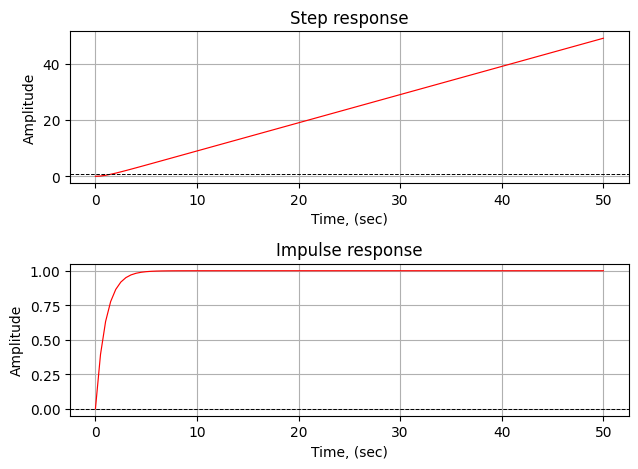

In [28]:
ftf = (tf([0, 5], [5, 5, 0]),'пример')
print(ftf[1])
print(ftf[0])
buildTF(ftf[0], 50)

пример

   5
-------
s^2 + s



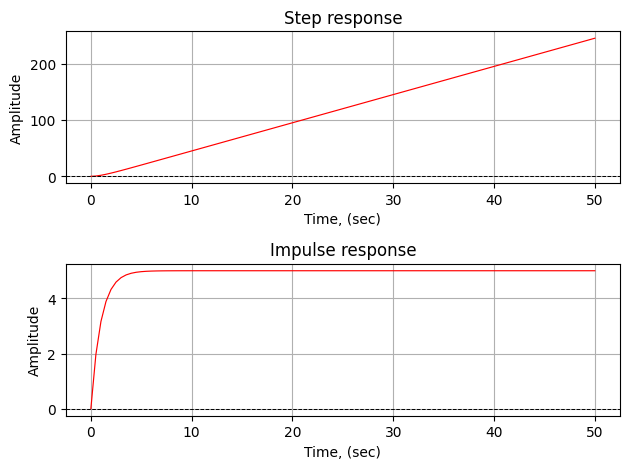

In [27]:
ftf = (tf([0, 5], [1, 1, 0]),'пример')
print(ftf[1])
print(ftf[0])
buildTF(ftf[0], 50)